## Import Library

In [1]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Untuk model supervised learning (Regresi)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Untuk evaluasi model regresi
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Untuk model unsupervised learning (Klastering)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Untuk mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Load Dataset

In [2]:
df = pd.read_csv('jabodetabek_house_price.csv')

Informasi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

Lima Baris Pertama Dataset

In [4]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Statistik Deskriptif Dataset

In [5]:
df.describe(include='all')

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
count,3553,3.553000e+03,3553,3553,3553,3553,3553.000000,3553.000000,3553,3552,...,3553,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3307,1906,3553.000000,3166
unique,3552,NaN,3342,397,380,9,NaN,NaN,2024,1,...,30,NaN,NaN,NaN,NaN,NaN,7,8,NaN,4
top,https://www.rumah123.com/properti/tangerang/ho...,NaN,"Sentul City,bogor","Sentul City, Bogor",Sentul City,Bogor,NaN,NaN,"Keamanan, Taman",rumah,...,2200 mah,NaN,NaN,NaN,NaN,NaN,bagus,selatan,NaN,unfurnished
freq,2,NaN,21,282,282,881,NaN,NaN,400,3552,...,1390,NaN,NaN,NaN,NaN,NaN,1437,562,NaN,2066
mean,NaN,4.191685e+09,NaN,NaN,NaN,NaN,-6.324721,106.792881,NaN,NaN,...,NaN,0.496482,0.370391,1.764590,3.880930,2018.137097,NaN,NaN,0.708978,NaN
std,NaN,1.375067e+10,NaN,NaN,NaN,NaN,0.129245,0.172159,NaN,NaN,...,NaN,0.685723,0.536024,0.637349,7.603708,7.641448,NaN,NaN,1.311879,NaN
min,NaN,4.200000e+07,NaN,NaN,NaN,NaN,-6.894828,106.402315,NaN,NaN,...,NaN,0.000000,0.000000,1.000000,0.000000,1870.000000,NaN,NaN,0.000000,NaN
25%,NaN,8.000000e+08,NaN,NaN,NaN,NaN,-6.397933,106.687295,NaN,NaN,...,NaN,0.000000,0.000000,1.000000,0.000000,2016.000000,NaN,NaN,0.000000,NaN
50%,NaN,1.500000e+09,NaN,NaN,NaN,NaN,-6.300733,106.799954,NaN,NaN,...,NaN,0.000000,0.000000,2.000000,1.000000,2021.000000,NaN,NaN,0.000000,NaN
75%,NaN,3.590000e+09,NaN,NaN,NaN,NaN,-6.231754,106.874766,NaN,NaN,...,NaN,1.000000,1.000000,2.000000,6.000000,2022.000000,NaN,NaN,1.000000,NaN


Ukuran Dataset

In [6]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 3553
Jumlah kolom: 27


Missing Values

In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
certificate              141
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
furnishing               387
dtype: int64


Duplikasi Data


In [8]:
# Menampilkan data yang terduplikasi (selain baris pertama)
duplicated_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {duplicated_rows.shape[0]}")
duplicated_rows

Jumlah data duplikat: 0


,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing


Analisis Statistik dan Visualisasi

Statistik Deskriptif Kolom Numerik:


,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000



Statistik Deskriptif Kolom Kategorikal:


,url,title,address,district,city,facilities,property_type,ads_id,certificate,electricity,property_condition,building_orientation,furnishing
count,3553,3553,3553,3553,3553,3553,3552,3549,3412,3553,3307,1906,3166
unique,3552,3342,397,380,9,2024,1,3457,4,30,7,8,4
top,https://www.rumah123.com/properti/tangerang/ho...,"Sentul City,bogor","Sentul City, Bogor",Sentul City,Bogor,"Keamanan, Taman",rumah,hos11004265,shm - sertifikat hak milik,2200 mah,bagus,selatan,unfurnished
freq,2,21,282,282,881,400,3552,3,3001,1390,1437,562,2066


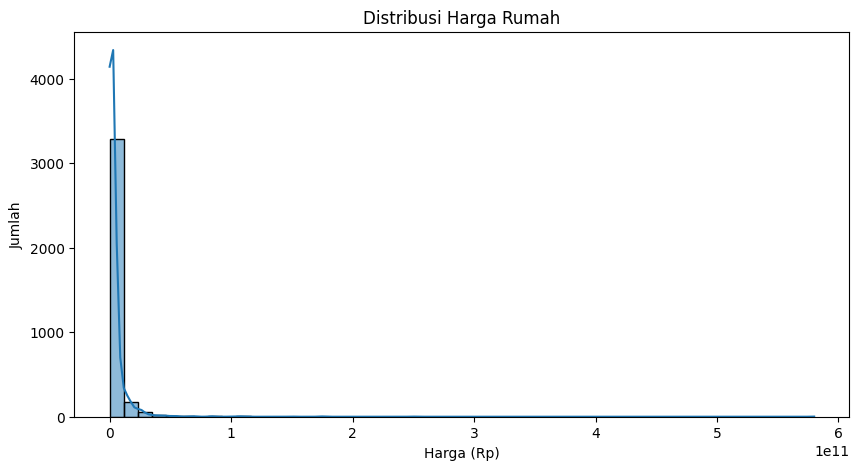

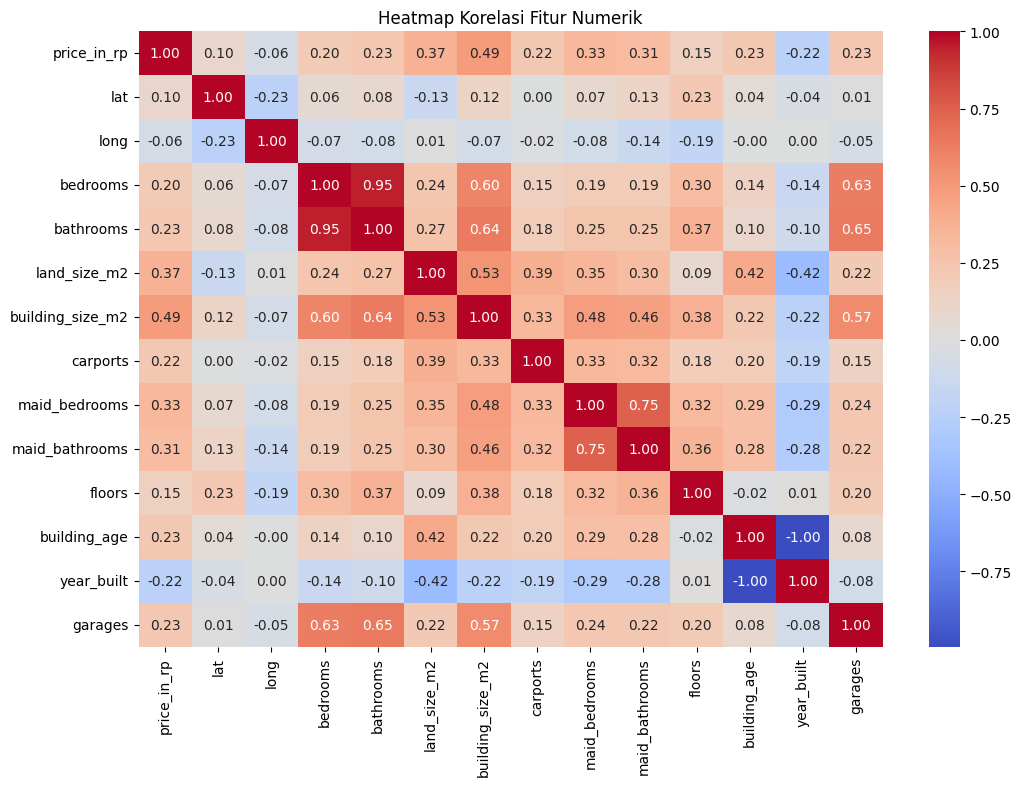

In [9]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif Kolom Numerik:")
display(df.describe())

# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif Kolom Kategorikal:")
display(df.describe(include=['object']))

# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 5))
sns.histplot(df['price_in_rp'].dropna(), bins=50, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (Rp)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## Data Preparation

Penanganan Missing Values

In [10]:
# Mengisi missing values pada kolom numerik dengan median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Mengisi missing values pada kolom kategorikal dengan modus
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Cek kembali jumlah missing values setelah penanganan
print(df.isnull().sum())

url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
lat                     0
long                    0
facilities              0
property_type           0
ads_id                  0
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate             0
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
year_built              0
property_condition      0
building_orientation    0
garages                 0
furnishing              0
dtype: int64


Feature Engineering

In [11]:
df['price_per_m2'] = df['price_in_rp'] / df['land_size_m2']

df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['maid_bedrooms'] + df['maid_bathrooms']

def age_category(age):
    if pd.isnull(age):
        return 'unknown'
    elif age <= 2:
        return 'baru'
    elif age <= 10:
        return 'sedang'
    else:
        return 'lama'

df['house_age_category'] = df['building_age'].apply(age_category)

df[['price_per_m2', 'total_rooms', 'house_age_category']].head()

,price_per_m2,total_rooms,house_age_category
0,1.251046e+07,9.0,sedang
1,2.309091e+07,5.0,baru
2,1.638655e+07,8.0,baru
3,1.833333e+07,8.0,sedang
4,1.371951e+07,9.0,sedang


Pemisahan Fitur dan Target

In [12]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(['price_in_rp'], axis=1)
y = df['price_in_rp']

print("Fitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Fitur (X) shape: (3553, 29)
Target (y) shape: (3553,)


Identifikasi Kolom Numerik dan Kategorikal

In [13]:
# Identifikasi kolom numerik dan kategorikal pada data fitur X
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

print("Kolom numerik:", num_features)
print("Kolom kategorikal:", cat_features)

Kolom numerik: ['lat', 'long', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'building_age', 'year_built', 'garages', 'price_per_m2', 'total_rooms']
Kolom kategorikal: ['url', 'title', 'address', 'district', 'city', 'facilities', 'property_type', 'ads_id', 'certificate', 'electricity', 'property_condition', 'building_orientation', 'furnishing', 'house_age_category']


Pembagian Data Training dan Testing

In [14]:
# Membagi data menjadi data training dan testing (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 2842
Jumlah data testing: 711


Preprocessing Pipeline (Scaling dan Encoding)

In [15]:
# Pipeline untuk preprocessing: scaling numerik dan encoding kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Contoh penggunaan: fit_transform pada data training, transform pada data testing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape X_train_processed:", X_train_processed.shape)
print("Shape X_test_processed:", X_test_processed.shape)

Shape X_train_processed: (2842, 10811)
Shape X_test_processed: (711, 10811)


## Membangun Model Supervised Learning (Regresi)

Model Regresi

In [16]:
# Membangun dan melatih beberapa model regresi
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.4f}")

# Menampilkan hasil evaluasi model dalam bentuk DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

Linear Regression: RMSE=4336411696.27, MAE=1990786941.23, R2=0.7422
Ridge Regression: RMSE=4327016823.32, MAE=1984019308.60, R2=0.7433
Lasso Regression: RMSE=5276377115.40, MAE=2825157417.35, R2=0.6183
Decision Tree: RMSE=6034670139.80, MAE=1013473980.31, R2=0.5007
Random Forest: RMSE=3947168568.22, MAE=677726230.66, R2=0.7864
Gradient Boosting: RMSE=3077916143.99, MAE=750686158.49, R2=0.8701
Support Vector Regressor: RMSE=8918638941.58, MAE=3231745325.76, R2=-0.0905


,RMSE,MAE,R2
Linear Regression,4.336412e+09,1.990787e+09,0.742189
Ridge Regression,4.327017e+09,1.984019e+09,0.743305
Lasso Regression,5.276377e+09,2.825157e+09,0.618309
Decision Tree,6.034670e+09,1.013474e+09,0.500716
Random Forest,3.947169e+09,6.777262e+08,0.786395
Gradient Boosting,3.077916e+09,7.506862e+08,0.870117
Support Vector Regressor,8.918639e+09,3.231745e+09,-0.090530


Pemilihan Model Terbaik dan Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Menentukan model regresi terbaik berdasarkan skor R2 tertinggi
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"Model terbaik: {best_model_name}")

# Hyperparameter tuning sederhana untuk model terbaik (contoh: Random Forest)

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    # Update best_model to the best estimator found
    best_model = grid_search.best_estimator_
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    best_model = grid_search.best_estimator_
elif best_model_name == 'Support Vector Regressor':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    best_model = grid_search.best_estimator_
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'alpha': [0.1, 1, 10, 100]
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    best_model = grid_search.best_estimator_
elif best_model_name == 'Lasso Regression':
    param_grid = {
        'alpha': [0.1, 1, 10, 100]
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    best_model = grid_search.best_estimator_
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(
        best_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_processed, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    best_model = grid_search.best_estimator_


# Evaluasi ulang model terbaik pada data test (jika tuning dilakukan)
y_pred_best = best_model.predict(X_test_processed)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Evaluasi Model Terbaik ({best_model_name}):")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R2: {r2_best:.4f}")

Model terbaik: Gradient Boosting
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 11525754821.541574
Evaluasi Model Terbaik (Gradient Boosting):
RMSE: 3188174390.20
MAE: 649374661.97
R2: 0.8606


## Membangun Model Unsupervised Learning (Klastering)

Pra-pemrosesan Data untuk Klastering

In [18]:
X_cluster = preprocessor.transform(X)

print("Shape data untuk klastering:", X_cluster.shape)

Shape data untuk klastering: (3553, 10811)


Menentukan Jumlah Klaster Optimal (Elbow Method atau Silhouette Score)

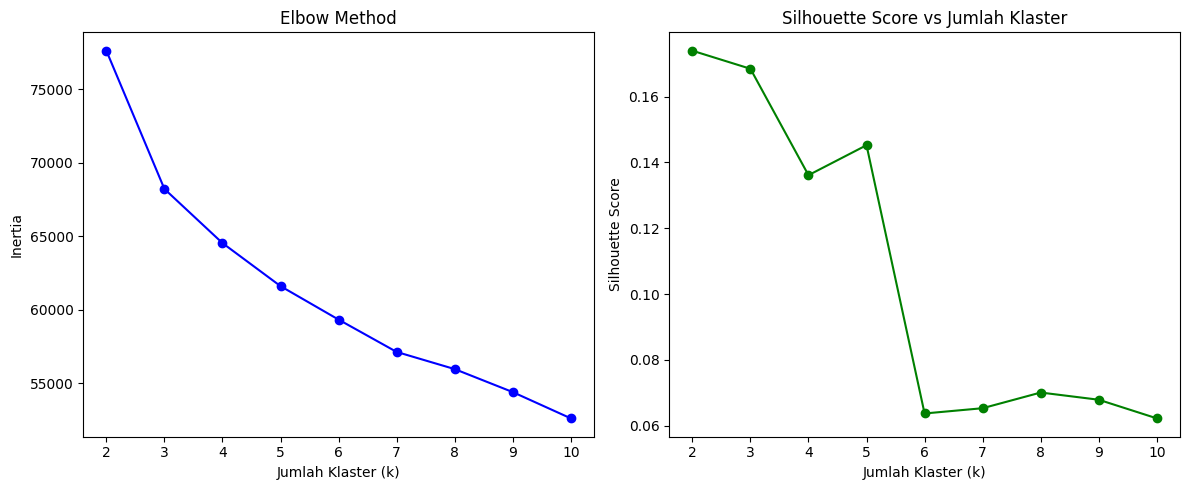

In [19]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_cluster, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Klaster')

plt.tight_layout()
plt.show()

Melatih Model K-Means

In [20]:
# Melatih model K-Means dengan jumlah klaster optimal (misal k=3, bisa diganti sesuai hasil analisis sebelumnya)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

# Menyimpan label klaster ke dataframe asli
df['cluster'] = cluster_labels

print(f"Jumlah data per klaster:\n{df['cluster'].value_counts()}")

Jumlah data per klaster:
cluster
0    2294
2    1255
1       4
Name: count, dtype: int64


Analisis Hasil Klastering

Statistik deskriptif tiap klaster:


price_in_rp                                                          \
              count          mean        median           min           max   
cluster                                                                       
0              2294  1.377551e+09  9.750000e+08  4.200000e+07  8.280000e+10   
1                 4  3.120000e+10  2.900000e+10  1.180000e+10  5.500000e+10   
2              1255  9.249525e+09  4.500000e+09  4.500000e+08  5.800000e+11   

        land_size_m2        building_size_m2           bedrooms  bathrooms  \
                mean median             mean  median       mean       mean   
cluster                                                                      
0         104.386225   84.0        94.814734    77.0   2.763296   1.957280   
1         762.000000  703.5      2929.250000  2108.5  65.000000  65.000000   
2         386.434263  220.0       345.477291   250.0   4.150598   3.631873   

        total_rooms  
               mean  
cluster              
0          4.908457  
1        131.000000  
2          9.890040

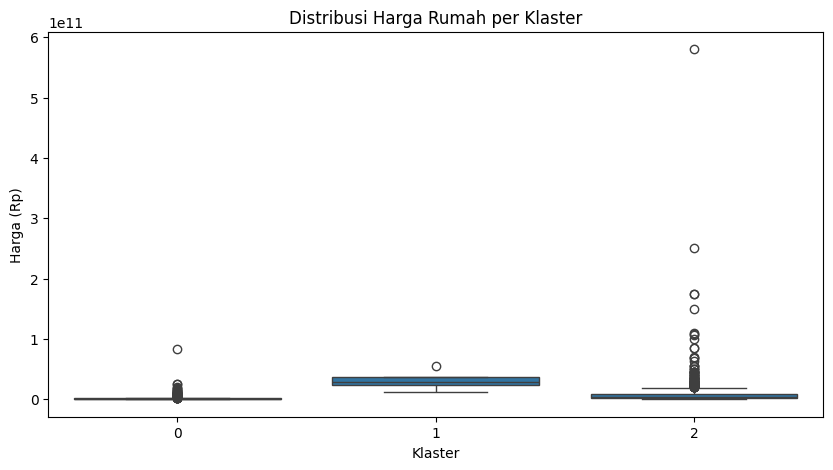

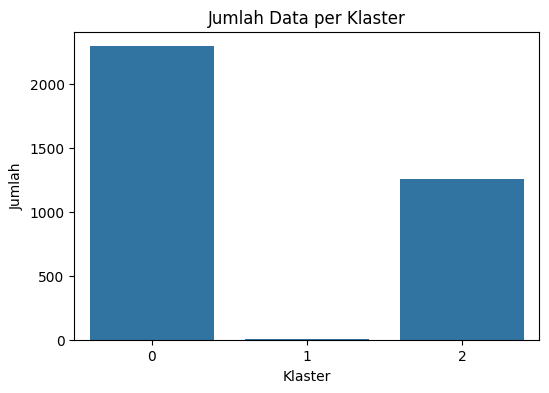

In [21]:
# Analisis hasil klastering: statistik deskriptif tiap klaster
cluster_summary = df.groupby('cluster').agg({
    'price_in_rp': ['count', 'mean', 'median', 'min', 'max'],
    'land_size_m2': ['mean', 'median'],
    'building_size_m2': ['mean', 'median'],
    'bedrooms': 'mean',
    'bathrooms': 'mean',
    'total_rooms': 'mean'
})

print("Statistik deskriptif tiap klaster:")
display(cluster_summary)

# Visualisasi distribusi harga rumah per klaster
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='price_in_rp', data=df)
plt.title('Distribusi Harga Rumah per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Harga (Rp)')
plt.show()

# Visualisasi jumlah data per klaster
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster', data=df)
plt.title('Jumlah Data per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah')
plt.show()

## Menampilkan Hasil Pengolahan Data

Ringkasan Hasil Regresi

In [22]:
# Menampilkan ringkasan hasil evaluasi model regresi
print("Ringkasan Hasil Evaluasi Model Regresi:")
display(results_df)

print(f"\nModel terbaik: {best_model_name}")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R2: {r2_best:.4f}")

Ringkasan Hasil Evaluasi Model Regresi:


,RMSE,MAE,R2
Linear Regression,4.336412e+09,1.990787e+09,0.742189
Ridge Regression,4.327017e+09,1.984019e+09,0.743305
Lasso Regression,5.276377e+09,2.825157e+09,0.618309
Decision Tree,6.034670e+09,1.013474e+09,0.500716
Random Forest,3.947169e+09,6.777262e+08,0.786395
Gradient Boosting,3.077916e+09,7.506862e+08,0.870117
Support Vector Regressor,8.918639e+09,3.231745e+09,-0.090530



Model terbaik: Gradient Boosting
RMSE: 3188174390.20
MAE: 649374661.97
R2: 0.8606


## Menyimpan Model

In [23]:
import joblib

# Simpan preprocessor dan model terbaik ke file .pkl
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(best_model, 'best_model.pkl')

print("Preprocessor dan model terbaik berhasil disimpan sebagai file .pkl")

Preprocessor dan model terbaik berhasil disimpan sebagai file .pkl
